In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15,8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [3]:
# 데이터 불러오기
df = pd.read_excel('자동차항만입출항전처리데이터.xlsx', index_col=0)
df

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,입출항 차 (시간),차항지,전출항지,입항일시,출항일시,MRN 번호
0,TITANIA,9HA2272,1,0,74255,MBJ 02,MBJ,116.000000,목포,장승포,2011-12-28 17:15:00,2012-01-02 13:15:00,12EUKOV0179
1,WESTERN HIGHWAY,3EJK5,1,0,39422,MBJ 02,MBJ,107.583333,SINGAPORE,"KANDA, FUKUOKA",2011-12-29 05:45:00,2012-01-02 17:20:00,12EVOLU0039
2,NORTHERN HIGHWAY,V7FT4,1,1,39422,MBJ 01,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,11GLVSU1985
3,NORTHERN HIGHWAY,V7FT4,1,0,39422,MBJ 03,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,12GLVSU0026
4,CAR STAR,A8VI6,1,0,43790,MBJ 03,MBJ,7.750000,YOKOHAMA,"NAGOYA, AICHI",2012-01-02 07:45:00,2012-01-02 15:30:00,12ZIMUECS10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,PRESTIGE ACE,H3NG,2,1,55878,MBJ 01,MBJ,15.750000,광양,SINGAPORE,2021-08-16 06:15:00,2021-08-16 22:00:00,21GLVSE147I
11408,PASSAMA,ZDNC6,2,1,47053,MBJ 03,MBJ,73.000000,MOJI/KITAKYUSHU,마산,2021-08-16 08:00:00,2021-08-19 09:00:00,21L53KI448I
11409,아세안 메저스티호,DSMZ8,2,1,71383,MBJ 02,MBJ,39.750000,평택.당진,마산,2021-08-17 06:15:00,2021-08-18 22:00:00,21EUKOV913I
11410,MORNING LILY,3FDI5,2,1,70853,MBJ 03,MBJ,15.750000,마산,평택.당진,2021-08-18 06:15:00,2021-08-18 22:00:00,21EUKOV921I


In [4]:
# 칼럼 이름 변경
df.rename(columns={'입출항 차 (시간)': '작업시간'}, inplace=True)
df

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,작업시간,차항지,전출항지,입항일시,출항일시,MRN 번호
0,TITANIA,9HA2272,1,0,74255,MBJ 02,MBJ,116.000000,목포,장승포,2011-12-28 17:15:00,2012-01-02 13:15:00,12EUKOV0179
1,WESTERN HIGHWAY,3EJK5,1,0,39422,MBJ 02,MBJ,107.583333,SINGAPORE,"KANDA, FUKUOKA",2011-12-29 05:45:00,2012-01-02 17:20:00,12EVOLU0039
2,NORTHERN HIGHWAY,V7FT4,1,1,39422,MBJ 01,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,11GLVSU1985
3,NORTHERN HIGHWAY,V7FT4,1,0,39422,MBJ 03,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,12GLVSU0026
4,CAR STAR,A8VI6,1,0,43790,MBJ 03,MBJ,7.750000,YOKOHAMA,"NAGOYA, AICHI",2012-01-02 07:45:00,2012-01-02 15:30:00,12ZIMUECS10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,PRESTIGE ACE,H3NG,2,1,55878,MBJ 01,MBJ,15.750000,광양,SINGAPORE,2021-08-16 06:15:00,2021-08-16 22:00:00,21GLVSE147I
11408,PASSAMA,ZDNC6,2,1,47053,MBJ 03,MBJ,73.000000,MOJI/KITAKYUSHU,마산,2021-08-16 08:00:00,2021-08-19 09:00:00,21L53KI448I
11409,아세안 메저스티호,DSMZ8,2,1,71383,MBJ 02,MBJ,39.750000,평택.당진,마산,2021-08-17 06:15:00,2021-08-18 22:00:00,21EUKOV913I
11410,MORNING LILY,3FDI5,2,1,70853,MBJ 03,MBJ,15.750000,마산,평택.당진,2021-08-18 06:15:00,2021-08-18 22:00:00,21EUKOV921I


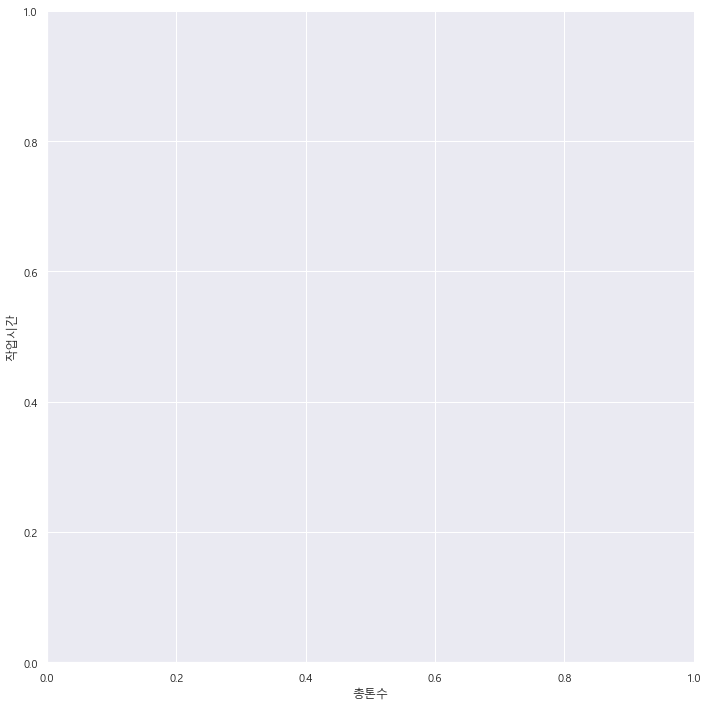

In [36]:
sns.pairplot(df, x_vars=['총톤수'], 
             y_vars='작업시간',size=10, aspect=1, kind='scatter')

In [9]:
# 'TV' Column을 변수 X로 지정
X = df['총톤수']

X.head()

0    74255
1    39422
2    39422
3    39422
4    43790
Name: 총톤수, dtype: int64

In [10]:
# 'Sales Column을 target y로 지정
y = df['작업시간']

y.head()

0    116.000000
1    107.583333
2     38.000000
3     38.000000
4      7.750000
Name: 작업시간, dtype: float64

In [11]:
# sklearn의 model_selection으로 train_test_split 불러오기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    random_state=100) # random_state 인자를 동일하게 하면 동일하게 분리

In [12]:
print(X_train.shape)
print(X_test.shape)

(7988,)
(3424,)


In [13]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print

(7988,)
(7988,)
(3424,)
(3424,)


<function print>

In [15]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [16]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# lr에 LinearRegression() 지정
lr = LinearRegression()

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train)

LinearRegression()

# 5.

In [17]:
lr.intercept_

16.025904135973878

In [18]:
lr.coef_

array([0.00023675])

In [19]:
# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

16.025904135973878
[0.00023675]


# 6. Predictions

In [20]:
# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

In [21]:
type(y_pred)

numpy.ndarray

In [22]:
y_pred

array([27.5497814 , 29.64877671, 30.04532726, ..., 30.04532726,
       31.33157151, 31.95042711])

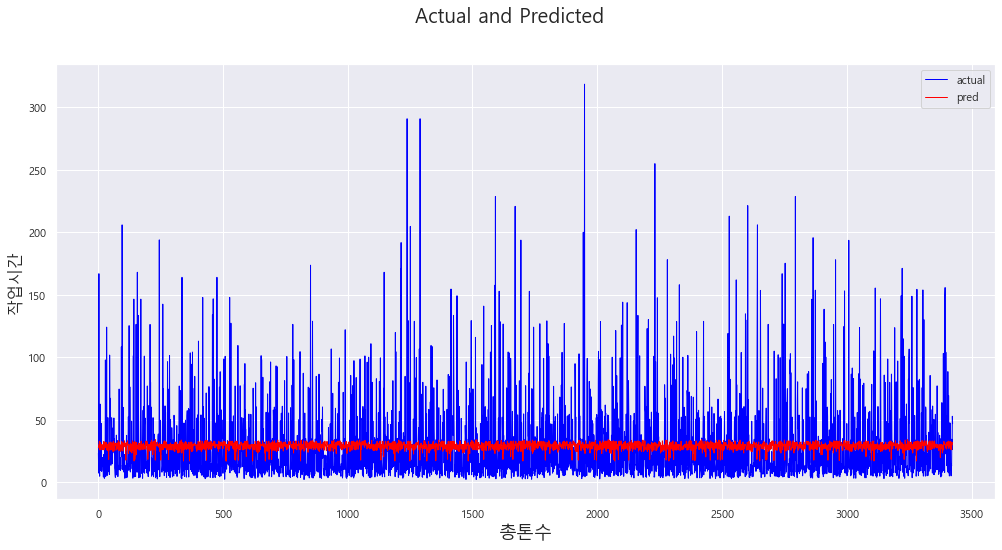

In [29]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 3425, 1)]  # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-", label='actual')
plt.plot(c,y_pred, color="red",  linewidth=1, linestyle="-", label='pred')
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('총톤수', fontsize=18)  # X-label
plt.ylabel('작업시간', fontsize=16)   # Y-label
plt.legend()

plt.show()

Text(0, 0.5, '작업시간실제-예측')

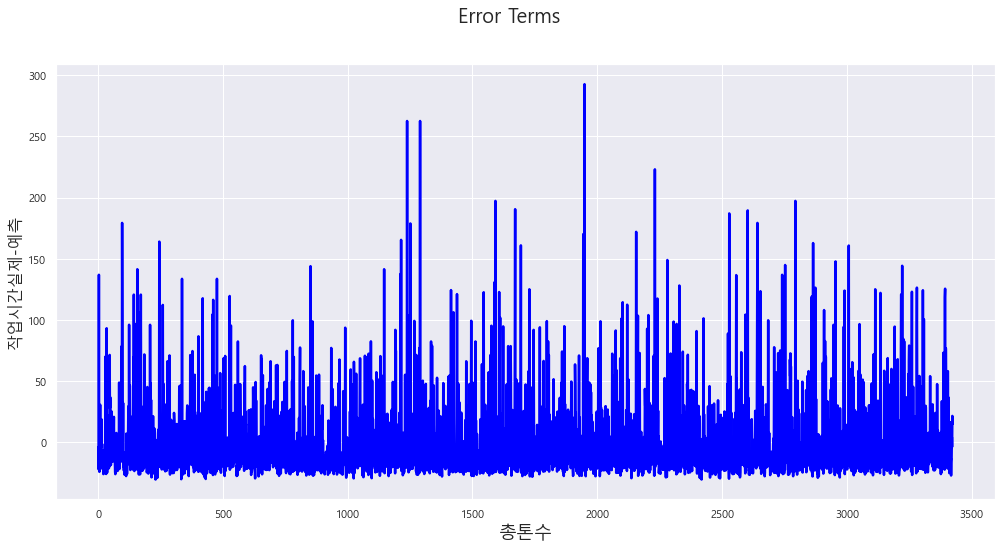

In [30]:
c = [i for i in range(1, 3425, 1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) # Plot heading 
plt.xlabel('총톤수', fontsize=18)              # X-label
plt.ylabel('작업시간실제-예측', fontsize=16)    # Y-label

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [32]:
print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Asolute_Error: 21.869487290230005
Mean_Squared_Error : 1068.5209173710255
r_square_value : -2.897857698846984e-05
